In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
session_df = pd.read_csv('task/SessionData-all.csv')
session_df.head()

,id,duration,watchId,age,gender,fairNumber
0,1,8021351,0Q3V,18-25,female,1
1,2,3752526,0Q3V,26-30,male,1
2,3,3989497,0QED,18-25,male,1
3,4,4979198,0QED,18-25,male,1
4,5,4836199,0QVM,18-25,male,1


In [3]:
student_data_df = pd.read_csv('task/student_data.csv')
student_data_df.head()

/home/sofialanetskaya/Git/bbdc24-mlbananas/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577: DtypeWarning: Columns (12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context
0,1,8,653.0,195.0,4324.0,1917829.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,50,659.0,198.0,4096.0,1917495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,89,645.0,149.0,4054.0,1917365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,128,752.0,213.0,4090.0,1918146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,169,652.0,232.0,4088.0,1919319.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
skeleton_df = pd.read_csv('task/student_skeleton.csv')
skeleton_df.head()

,sessionId,timestamp,affect,context
0,1,1652042,True,False
1,1,1658301,False,True
2,1,5914412,True,False
3,1,5921368,False,True
4,2,629724,True,False


In [4]:
student_data_df[student_data_df.affect.notna()]

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context
13023,1,503234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RELAXED,NaN
69440,1,2689934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RELAXED,NaN
97876,1,3788764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RELAXED,NaN
179014,1,6924725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HAPPY,NaN
250081,2,1651527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HAPPY,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7968715,58,1037803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HAPPY,NaN
7990117,58,1865465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAD,NaN
8008986,58,2595091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HAPPY,NaN
8061087,58,4610020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HAPPY,NaN


In [6]:
student_data_df[(student_data_df.context.notna())&(student_data_df.sessionId==1)]

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context
13173,1,509006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WALKING
69715,1,2700529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CONVERSATION
97986,1,3793024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OTHER
179111,1,6928402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WALKING


In [7]:
student_data_df.describe()

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement
count,8.824678e+06,8.824678e+06,8.485786e+06,8.485786e+06,8.485786e+06,8.485786e+06,337675.000000,337675.000000,337675.000000,337675.000000,372.0,372.0
mean,3.243961e+01,3.509351e+06,-5.859700e+02,-2.246576e+03,8.656262e+02,2.059270e+06,47.162639,767.086509,-3.529521,0.286823,1.0,1.0
std,1.618591e+01,2.288202e+06,2.093514e+03,1.602237e+03,2.053281e+03,2.554720e+05,41.084118,535.460339,6.400345,0.452279,0.0,0.0
min,1.000000e+00,0.000000e+00,-3.275700e+04,-3.275800e+04,-3.275800e+04,-6.043650e+05,0.000000,0.000000,-999.000000,0.000000,1.0,1.0
25%,1.900000e+01,1.610097e+06,-2.298000e+03,-3.497000e+03,-3.080000e+02,1.987464e+06,0.000000,394.000000,-10.000000,0.000000,1.0,1.0
50%,3.500000e+01,3.220053e+06,-2.510000e+02,-2.552000e+03,8.390000e+02,2.079625e+06,71.000000,592.000000,1.000000,0.000000,1.0,1.0
75%,4.500000e+01,5.143988e+06,7.870000e+02,-1.255000e+03,2.438000e+03,2.155102e+06,82.000000,960.000000,1.000000,1.000000,1.0,1.0
max,5.800000e+01,9.360487e+06,3.266700e+04,3.276300e+04,3.276400e+04,4.195641e+06,127.000000,3107.000000,1.000000,1.000000,1.0,1.0


In [9]:
single_session = student_data_df[(student_data_df.sessionId==1)]
single_session.describe()

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement
count,207401.0,2.074010e+05,199577.000000,199577.000000,199577.000000,1.995770e+05,7804.000000,7804.000000,7804.000000,7804.000000,6.0,6.0
mean,1.0,4.013261e+06,536.800839,-2245.605330,2134.580212,2.057416e+06,53.969118,817.833162,-1.380702,0.747181,1.0,1.0
std,0.0,2.315102e+06,1457.841495,1794.122949,1682.923167,1.200464e+05,36.917359,278.926992,4.103554,0.434656,0.0,0.0
min,1.0,8.000000e+00,-6603.000000,-32628.000000,-16853.000000,1.711121e+06,0.000000,0.000000,-10.000000,0.000000,1.0,1.0
25%,1.0,2.010368e+06,48.000000,-3590.000000,991.000000,2.033271e+06,0.000000,618.000000,-3.000000,0.000000,1.0,1.0
50%,1.0,4.013942e+06,522.000000,-2924.000000,2439.000000,2.086895e+06,75.000000,756.000000,1.000000,1.000000,1.0,1.0
75%,1.0,6.018223e+06,714.000000,-634.000000,3446.000000,2.129097e+06,80.000000,925.000000,1.000000,1.000000,1.0,1.0
max,1.0,8.021348e+06,14432.000000,12989.000000,31358.000000,2.646373e+06,104.000000,2498.000000,1.000000,1.000000,1.0,1.0


<AxesSubplot:xlabel='affect'>

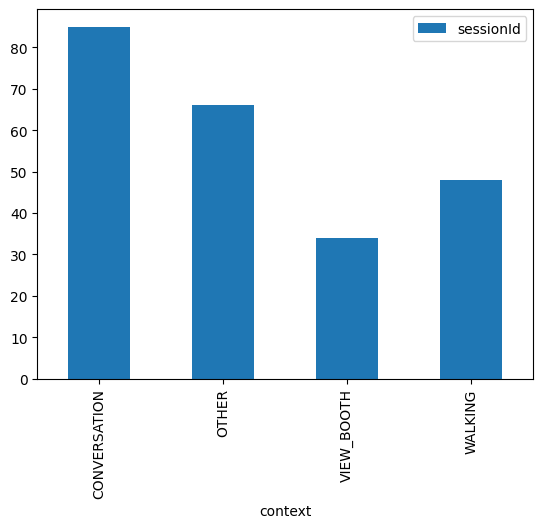

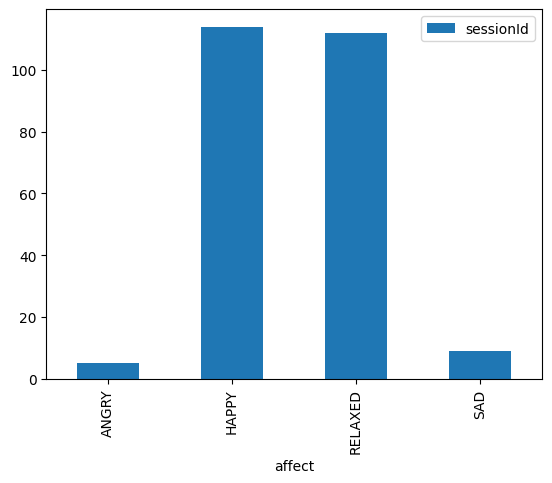

In [46]:
student_data_df[(student_data_df.affect.notna())|(student_data_df.context.notna())][["sessionId","context"]].groupby("context").count().plot.bar()
student_data_df[(student_data_df.affect.notna())|(student_data_df.context.notna())][["sessionId","affect"]].groupby("affect").count().plot.bar()

In [20]:
predictions = skeleton_df[skeleton_df.sessionId==1]

In [22]:
predictions["label"] = predictions.affect + predictions.context

/tmp/ipykernel_5255/3320692091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions["label"] = predictions.affect + predictions.context


In [23]:
predictions

,sessionId,timestamp,affect,context,label
0,1,1652042,True,False,True
1,1,1658301,False,True,True
2,1,5914412,True,False,True
3,1,5921368,False,True,True


In [26]:
predictions["label"]=100

/tmp/ipykernel_5255/933084445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions["label"]=100


In [30]:
single_session = single_session.join(predictions["label"], on="timestamp")

In [51]:
single_session
columns_data = ['timestamp', 'x', 'y', 'z', 'ppgValue', 'hr', 'hrIbi',
       'hrStatus', 'ibiStatus', 'notification', 'engagement', 'affect',
       'context', 'label']

In [52]:
single_session.dropna(subset=columns_data)

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context,label


In [53]:
single_session.affect.unique()

array([nan, 'RELAXED', 'HAPPY'], dtype=object)

In [65]:
merged_df = pd.merge(left=student_data_df, right=session_df, left_on="sessionId", right_on="id")

In [57]:
student_data_df[student_data_df.sessionId==6]

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context
536075,6,5,-1062.0,1295.0,3813.0,2043525.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536076,6,45,-1117.0,1506.0,3698.0,2045553.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536077,6,86,-1303.0,1312.0,3624.0,2047194.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536078,6,126,-1081.0,1329.0,3649.0,2047700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536079,6,167,-1053.0,1344.0,3705.0,2045109.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657075,6,4677252,-875.0,2064.0,3428.0,2048744.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
657076,6,4677293,-875.0,2168.0,3381.0,2046167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
657077,6,4677332,-843.0,2237.0,3336.0,2043879.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
657078,6,4677372,-212.0,2839.0,2902.0,2042474.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
student_data_df.sessionId.unique()
missing_id = [5,12,13,47,52,59]

array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 14, 15, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 49, 50, 51, 53, 54, 55, 56, 57, 58, 30, 11, 16,
       28, 48])

In [59]:
skeleton_df.sessionId.unique()

array([ 1,  2,  3,  4,  6,  8,  9, 10, 14, 15, 17, 19, 20, 21, 22, 23, 24,
       25, 26, 27, 29, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 49, 50, 51, 53, 54, 55, 56, 57, 58])

In [60]:
single_session_identity = {
"sessionId": "",
"gender":"",
"age":"",
"average_hr":"",
"watchId":"",
"affect":[{"timestamp":"", "affect":""}],
"context":[{"timestamp":"", "context":""}]
}

In [62]:
single_session_identity["age"]

''

In [84]:
from dataclasses import dataclass
from typing import List, Optional

# Define the main dataclass for a single session identity
@dataclass
class SingleSessionIdentity:
    sessionId: str
    gender: str
    age: str
    average_hr: float
    watchId: str
    affect: dict
    context: dict

In [87]:
from typing import Dict

# Function to process the dataframe and extract data into SingleSessionIdentity
def process_dataframe(df: pd.DataFrame) -> Dict[int, SingleSessionIdentity]:
    session_identities = {}

    for session_id, session_data in df.groupby('sessionId'):
        affect_data = session_data[session_data.affect.notna()][["timestamp", "affect"]].reset_index(drop=True).to_dict()
        context_data = session_data[session_data.context.notna()][["timestamp", "context"]].reset_index(drop=True).to_dict()

        single_session_identity = SingleSessionIdentity(
            sessionId=str(session_data['sessionId'].iloc[0]),
            gender=str(session_data['gender'].iloc[0]),
            age=str(session_data['age'].iloc[0]),
            average_hr=str(session_data['hr'].mean()),
            watchId=str(session_data['watchId'].iloc[0]),
            affect=affect_data,
            context=context_data
        )

        session_identities[session_id] = single_session_identity

    return session_identities


In [88]:
process_dataframe(merged_df)

{1: SingleSessionIdentity(sessionId='1', gender='female', age='18-25', average_hr='53.96911840082009', watchId='0Q3V', affect={'timestamp': {0: 503234, 1: 2689934, 2: 3788764, 3: 6924725}, 'affect': {0: 'RELAXED', 1: 'RELAXED', 2: 'RELAXED', 3: 'HAPPY'}}, context={'timestamp': {0: 509006, 1: 2700529, 2: 3793024, 3: 6928402}, 'context': {0: 'WALKING', 1: 'CONVERSATION', 2: 'OTHER', 3: 'WALKING'}}),
 2: SingleSessionIdentity(sessionId='2', gender='male', age='26-30', average_hr='92.03550295857988', watchId='0Q3V', affect={'timestamp': {0: 1651527, 1: 2500736, 2: 3354627}, 'affect': {0: 'HAPPY', 1: 'HAPPY', 2: 'RELAXED'}}, context={'timestamp': {0: 1659198, 1: 2502728, 2: 3361063}, 'context': {0: 'OTHER', 1: 'OTHER', 2: 'WALKING'}}),
 3: SingleSessionIdentity(sessionId='3', gender='male', age='18-25', average_hr='54.49655537890832', watchId='0QED', affect={'timestamp': {0: 270489, 1: 1275542, 2: 1287900, 3: 3167176}, 'affect': {0: 'RELAXED', 1: 'HAPPY', 2: 'RELAXED', 3: 'RELAXED'}}, conte